<h2>Manga Demographic Classification System</h2>

---

<details>
  <summary><h3 style="color: #EFD1B4;" id="table_content">Nội dung</h3></summary>

  - Cài đặt thư viện
  - Tải và hiểu dữ liệu
  - Kỹ thuật xử lý đặc trưng
  - Xử lí dữ liệu bất cân bằng
  - Xây dựng mô hình
</details>

<h2 style="color: #EFD1B4;" id="libraries_importing">Cài đặt thư viện</h2>

---

Chúng tôi sử dụng các thư viện phổ biến trong Python như `pandas` để xử lý và phân tích dữ liệu, `scikit-learn` để xây dựng và huấn luyện các mô hình học máy, và `imblearn` để xử lý các vấn đề mất cân bằng dữ liệu.

Các bước đầu tiên của dự án bao gồm việc chuẩn bị dữ liệu, từ việc chia tách dữ liệu huấn luyện và kiểm tra, chuẩn hóa các đặc trưng số liệu, đến việc mã hóa các nhãn phân loại. Chúng tôi sử dụng mô hình học máy như `ExtraTreesClassifier` để huấn luyện và phân loại dữ liệu. Bên cạnh đó, phương pháp `SMOTEENN` cũng được áp dụng để cải thiện chất lượng mô hình khi dữ liệu bị mất cân bằng.

Cuối cùng, các chỉ số đánh giá như `r2_score`, `confusion_matrix`, và `classification_report` được sử dụng để đo lường hiệu suất của mô hình, giúp đánh giá chính xác mức độ phù hợp và hiệu quả mô hình. Mô hình này được xây dựng để giải quyết các bài toán phân loại với dữ liệu phức tạp và yêu cầu độ chính xác cao.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import ast
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.combine import SMOTEENN

In [2]:
ANIME_DATA = r'..\Preprocessing\Preprocessed Data\Manga\manga_processed.csv'
ANIME_DATA = os.path.abspath(ANIME_DATA)
print(ANIME_DATA)

d:\Data Science Introduction\Final_Project\Preprocessing\Preprocessed Data\Manga\manga_processed.csv


<h2 style="color: #EFD1B4;" id="load_and_understand_data">Tải và hiểu dữ liệu</h2>

---


In [3]:
df = pd.read_csv(ANIME_DATA)
df

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Types,Volumes,Chapters,...,Genres,Demographic,Serialization,Author,Released date,Completed date,Total Review,Recommended,Mixed Feelings,Not Recommended
0,Berserk,9.47,363720,1,1,725079,130489,Manga,3,16,...,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",Seinen,Young Animal,"[""'Miura,Kentarou'"", ""'Studio Gaga'""]",1989-08-25,Updating,289,252,17,20
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,9.31,172219,2,23,280428,46269,Manga,24,96,...,"[""'Action'"", ""'Adventure'"", ""'Mystery'"", ""'Sup...",Seinen,Ultra Jump,"[""'Araki,Hirohiko'""]",2004-01-19,2011-04-19,131,123,7,1
2,Vagabond,9.26,154583,3,13,406082,44258,Manga,37,327,...,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",Seinen,Morning,"[""'Inoue,Takehiko'"", ""'Yoshikawa,Eiji'""]",1998-09-03,2015-05-21,104,93,9,2
3,One Piece,9.22,392811,4,4,642620,119974,Manga,3,16,...,"[""'Action'"", ""'Adventure'"", ""'Fantasy'""]",Shounen,Shounen Jump (Weekly),"[""'Oda,Eiichiro'""]",1997-07-22,Updating,231,190,21,20
4,Monster,9.16,104327,5,29,258581,22008,Manga,18,162,...,"[""'Award Winning'"", ""'Drama'"", ""'Mystery'"", ""'...",Seinen,Big Comic Original,"[""'Urasawa,Naoki'""]",1994-12-05,2001-12-20,86,69,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19053,Akihabara Dennou-gumi Patapi!,2.43,501,19994,37132,184,2,Manga,1,11,...,"[""'Action'"", ""'Sci-Fi'""]",Shoujo,Nakayoshi,"[""'Kotobuki,Tsukasa'""]",1997-12-29,1998-11-02,0,0,0,0
19054,Jinki,2.43,501,19996,25633,429,0,Manga,4,16,...,"[""'Action'"", ""'Drama'"", ""'Supernatural'"", ""'Me...",Shounen,Gangan Wing,"[""'Tsunashima,Shirou'""]",2000-01-26,2001-10-26,0,0,0,0
19055,Magical Nan,2.43,501,19997,35720,203,0,Manga,1,3,...,"[""'Comedy'"", ""'Romance'""]",Shoujo,NaN,"[""'Watase,Yuu'""]",1990-01-01,1990-01-01,0,0,0,0
19056,Otenami Haiken!,2.43,501,19998,37133,184,0,Manga,1,2,...,"[""'Romance'""]",Shoujo,NaN,"[""'Watase,Yuu'""]",1991-02-01,1991-02-01,0,0,0,0


Các thuộc tính của tập dữ liệu

In [4]:
df.keys()

Index(['Title', 'Score', 'Vote', 'Ranked', 'Popularity', 'Members', 'Favorite',
       'Types', 'Volumes', 'Chapters', 'Status', 'Genres', 'Demographic',
       'Serialization', 'Author', 'Released date', 'Completed date',
       'Total Review', 'Recommended', 'Mixed Feelings', 'Not Recommended'],
      dtype='object')

In [5]:
df.isnull().sum()

Title                 0
Score                 0
Vote                  0
Ranked                0
Popularity            0
Members               0
Favorite              0
Types                 0
Volumes               0
Chapters              0
Status                0
Genres                0
Demographic        8006
Serialization      2922
Author                0
Released date         0
Completed date        0
Total Review          0
Recommended           0
Mixed Feelings        0
Not Recommended       0
dtype: int64

<h2 style="color: #EFD1B4;" id="feature_engineering">Kỹ thuật xử lí đặc trưng</h2>

---


Chia tập dữ liệu vào 2 DataFrame khác nhau

`known_demographic_df` gồm những dòng có giá trị trong cột `demographic`

`unknown_demographic_df` gồm những dòng không có giá trị trong cột `demographic`

In [6]:
known_demographic_df = df[df['Demographic'].notna()]
known_demographic_df

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Types,Volumes,Chapters,...,Genres,Demographic,Serialization,Author,Released date,Completed date,Total Review,Recommended,Mixed Feelings,Not Recommended
0,Berserk,9.47,363720,1,1,725079,130489,Manga,3,16,...,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",Seinen,Young Animal,"[""'Miura,Kentarou'"", ""'Studio Gaga'""]",1989-08-25,Updating,289,252,17,20
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,9.31,172219,2,23,280428,46269,Manga,24,96,...,"[""'Action'"", ""'Adventure'"", ""'Mystery'"", ""'Sup...",Seinen,Ultra Jump,"[""'Araki,Hirohiko'""]",2004-01-19,2011-04-19,131,123,7,1
2,Vagabond,9.26,154583,3,13,406082,44258,Manga,37,327,...,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",Seinen,Morning,"[""'Inoue,Takehiko'"", ""'Yoshikawa,Eiji'""]",1998-09-03,2015-05-21,104,93,9,2
3,One Piece,9.22,392811,4,4,642620,119974,Manga,3,16,...,"[""'Action'"", ""'Adventure'"", ""'Fantasy'""]",Shounen,Shounen Jump (Weekly),"[""'Oda,Eiichiro'""]",1997-07-22,Updating,231,190,21,20
4,Monster,9.16,104327,5,29,258581,22008,Manga,18,162,...,"[""'Award Winning'"", ""'Drama'"", ""'Mystery'"", ""'...",Seinen,Big Comic Original,"[""'Urasawa,Naoki'""]",1994-12-05,2001-12-20,86,69,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19053,Akihabara Dennou-gumi Patapi!,2.43,501,19994,37132,184,2,Manga,1,11,...,"[""'Action'"", ""'Sci-Fi'""]",Shoujo,Nakayoshi,"[""'Kotobuki,Tsukasa'""]",1997-12-29,1998-11-02,0,0,0,0
19054,Jinki,2.43,501,19996,25633,429,0,Manga,4,16,...,"[""'Action'"", ""'Drama'"", ""'Supernatural'"", ""'Me...",Shounen,Gangan Wing,"[""'Tsunashima,Shirou'""]",2000-01-26,2001-10-26,0,0,0,0
19055,Magical Nan,2.43,501,19997,35720,203,0,Manga,1,3,...,"[""'Comedy'"", ""'Romance'""]",Shoujo,NaN,"[""'Watase,Yuu'""]",1990-01-01,1990-01-01,0,0,0,0
19056,Otenami Haiken!,2.43,501,19998,37133,184,0,Manga,1,2,...,"[""'Romance'""]",Shoujo,NaN,"[""'Watase,Yuu'""]",1991-02-01,1991-02-01,0,0,0,0


In [7]:
known_demographic_df['Demographic'].unique()

array(['Seinen', 'Shounen', 'Shoujo', 'Josei', 'Kids'], dtype=object)

Trực quan hóa sự phân phối của các giá trị trong cột `Demographic`

In [8]:
known_demographic_df['Demographic'].value_counts()

Demographic
Shoujo     3769
Shounen    3266
Seinen     3148
Josei       797
Kids         72
Name: count, dtype: int64

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_20380\508547856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demographic_distribute.index, y=demographic_distribute.values, palette='viridis')


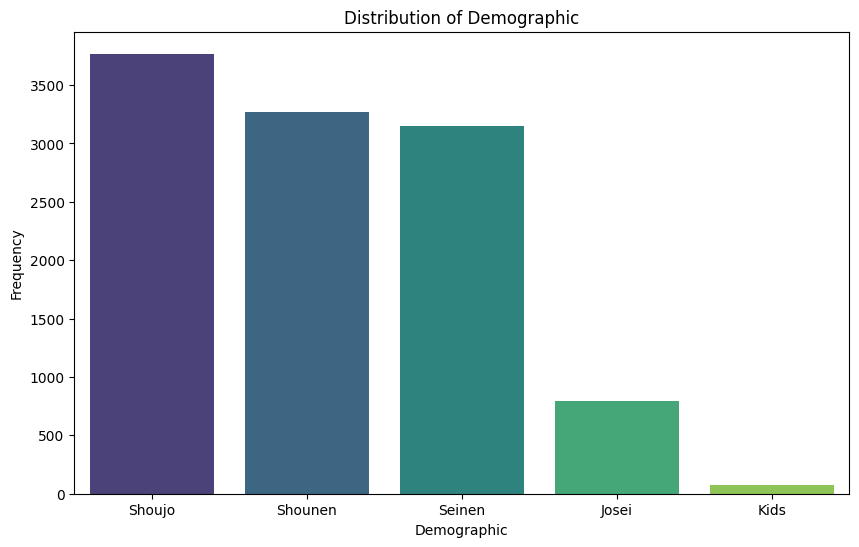

In [9]:
demographic_distribute = known_demographic_df['Demographic'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=demographic_distribute.index, y=demographic_distribute.values, palette='viridis')
plt.title('Distribution of Demographic')
plt.xlabel('Demographic')
plt.ylabel('Frequency')
plt.show()

In [10]:
X = known_demographic_df.drop(columns=['Title', 'Ranked', 'Types', 'Volumes', 'Chapters', 'Status', 'Serialization', 'Author', 'Released date', 'Completed date', 'Demographic'])
y = known_demographic_df['Demographic']
X

,Score,Vote,Popularity,Members,Favorite,Genres,Total Review,Recommended,Mixed Feelings,Not Recommended
0,9.47,363720,1,725079,130489,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",289,252,17,20
1,9.31,172219,23,280428,46269,"[""'Action'"", ""'Adventure'"", ""'Mystery'"", ""'Sup...",131,123,7,1
2,9.26,154583,13,406082,44258,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",104,93,9,2
3,9.22,392811,4,642620,119974,"[""'Action'"", ""'Adventure'"", ""'Fantasy'""]",231,190,21,20
4,9.16,104327,29,258581,22008,"[""'Award Winning'"", ""'Drama'"", ""'Mystery'"", ""'...",86,69,11,6
...,...,...,...,...,...,...,...,...,...,...
19053,2.43,501,37132,184,2,"[""'Action'"", ""'Sci-Fi'""]",0,0,0,0
19054,2.43,501,25633,429,0,"[""'Action'"", ""'Drama'"", ""'Supernatural'"", ""'Me...",0,0,0,0
19055,2.43,501,35720,203,0,"[""'Comedy'"", ""'Romance'""]",0,0,0,0
19056,2.43,501,37133,184,0,"[""'Romance'""]",0,0,0,0


In [11]:
X

,Score,Vote,Popularity,Members,Favorite,Genres,Total Review,Recommended,Mixed Feelings,Not Recommended
0,9.47,363720,1,725079,130489,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",289,252,17,20
1,9.31,172219,23,280428,46269,"[""'Action'"", ""'Adventure'"", ""'Mystery'"", ""'Sup...",131,123,7,1
2,9.26,154583,13,406082,44258,"[""'Action'"", ""'Adventure'"", ""'Award Winning'"",...",104,93,9,2
3,9.22,392811,4,642620,119974,"[""'Action'"", ""'Adventure'"", ""'Fantasy'""]",231,190,21,20
4,9.16,104327,29,258581,22008,"[""'Award Winning'"", ""'Drama'"", ""'Mystery'"", ""'...",86,69,11,6
...,...,...,...,...,...,...,...,...,...,...
19053,2.43,501,37132,184,2,"[""'Action'"", ""'Sci-Fi'""]",0,0,0,0
19054,2.43,501,25633,429,0,"[""'Action'"", ""'Drama'"", ""'Supernatural'"", ""'Me...",0,0,0,0
19055,2.43,501,35720,203,0,"[""'Comedy'"", ""'Romance'""]",0,0,0,0
19056,2.43,501,37133,184,0,"[""'Romance'""]",0,0,0,0


In [12]:
# Convert the string representation of lists into actual lists
X["Genres"] = X["Genres"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Remove extra quotes around genre names (e.g., "'Horror'" -> "Horror")
X["Genres"] = X["Genres"].apply(lambda genres: [genre.strip("'") for genre in genres])

In [13]:
mlb = MultiLabelBinarizer()

X = pd.concat([X,pd.DataFrame(mlb.fit_transform(X["Genres"]),columns=mlb.classes_, index=X.index)],axis=1)

X

,Score,Vote,Popularity,Members,Favorite,Genres,Total Review,Recommended,Mixed Feelings,Not Recommended,...,Survival,Suspense,Team Sports,Time Travel,Urban Fantasy,Vampire,Video Game,Villainess,Visual Arts,Workplace
0,9.47,363720,1,725079,130489,"[Action, Adventure, Award Winning, Drama, Fant...",289,252,17,20,...,0,0,0,0,0,0,0,0,0,0
1,9.31,172219,23,280428,46269,"[Action, Adventure, Mystery, Supernatural, His...",131,123,7,1,...,0,0,0,0,0,0,0,0,0,0
2,9.26,154583,13,406082,44258,"[Action, Adventure, Award Winning, Historical,...",104,93,9,2,...,0,0,0,0,0,0,0,0,0,0
3,9.22,392811,4,642620,119974,"[Action, Adventure, Fantasy]",231,190,21,20,...,0,0,0,0,0,0,0,0,0,0
4,9.16,104327,29,258581,22008,"[Award Winning, Drama, Mystery, Adult Cast, Ps...",86,69,11,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19053,2.43,501,37132,184,2,"[Action, Sci-Fi]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19054,2.43,501,25633,429,0,"[Action, Drama, Supernatural, Mecha]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19055,2.43,501,35720,203,0,"[Comedy, Romance]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19056,2.43,501,37133,184,0,[Romance],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X.drop(columns=['Genres'], inplace=True)

Chuẩn hóa các cột dạng số

In [15]:
standard_scaler = StandardScaler()
scaled_X = standard_scaler.fit_transform(X)

In [16]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Demographic' to numerical values
y = label_encoder.fit_transform(y)

# Get the mapping of string labels to numeric values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label Mapping:", label_mapping)

# Alternatively, you can directly access classes_ and transform methods:
print("Classes in order:", label_encoder.classes_)

Label Mapping: {'Josei': np.int64(0), 'Kids': np.int64(1), 'Seinen': np.int64(2), 'Shoujo': np.int64(3), 'Shounen': np.int64(4)}
Classes in order: ['Josei' 'Kids' 'Seinen' 'Shoujo' 'Shounen']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

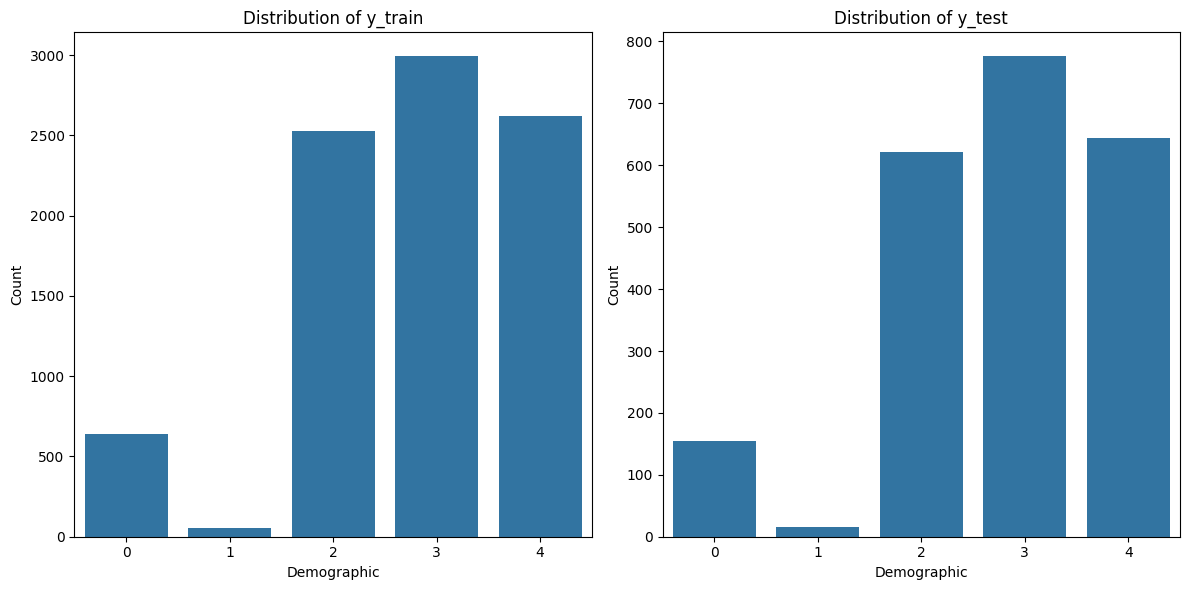

In [18]:
# Plot distribution of y_train and y_test
plt.figure(figsize=(12, 6))

# Plot distribution for y_train
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Distribution of y_train")
plt.xlabel("Demographic")
plt.ylabel("Count")

# Plot distribution for y_test
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Distribution of y_test")
plt.xlabel("Demographic")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


<h2 style="color: #EFD1B4;" id="balanced_data_handling">Xử lý dữ liệu bất cân bằng</h2>

---

Từ biểu đồ trên có thể thấy phân phối của các giá trị trong cột `Demographic` không đều nhau, thể loại `Shoujo` đạt ngưỡng cao nhất (~3000) trong tập train, nhưng thể loại `Kids` chỉ đạt ngưỡng (~100), điều này làm cho dữ liệu bị mất cân bằng nặng

In [19]:
X.keys()

Index(['Score', 'Vote', 'Popularity', 'Members', 'Favorite', 'Total Review',
       'Recommended', 'Mixed Feelings', 'Not Recommended', 'Action',
       'Adult Cast', 'Adventure', 'Anthropomorphic', 'Avant Garde',
       'Award Winning', 'Boys Love', 'CGDCT', 'Childcare', 'Combat Sports',
       'Comedy', 'Crossdressing', 'Delinquents', 'Detective', 'Drama', 'Ecchi',
       'Educational', 'Fantasy', 'Gag Humor', 'Girls Love', 'Gore', 'Gourmet',
       'Harem', 'High Stakes Game', 'Historical', 'Horror', 'Idols (Female)',
       'Idols (Male)', 'Isekai', 'Iyashikei', 'Love Polygon',
       'Love Status Quo', 'Magical Sex Shift', 'Mahou Shoujo', 'Martial Arts',
       'Mecha', 'Medical', 'Memoir', 'Military', 'Music', 'Mystery',
       'Mythology', 'Organized Crime', 'Otaku Culture', 'Parody',
       'Performing Arts', 'Pets', 'Psychological', 'Racing', 'Reincarnation',
       'Reverse Harem', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Showbiz',
       'Slice of Life', 'Space', 'Sports',

Thực hiện `upsampling` và `downsampling` bằng thuật toán SMOTE, sau đó loại bỏ các giá trị ngoại lai bằng thuật toán ENN

In [20]:
smote_enn = SMOTEENN(random_state=42, sampling_strategy = 'not majority')
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, y_train)

y_smoteenn_df = pd.DataFrame(y_smoteenn, columns=['balanced_Demographic'])
X_smoteenn_df = pd.DataFrame(X_smoteenn, columns=X.keys())

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_20380\3121613915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=demographic_distribute.index, y=demographic_distribute.values, palette='viridis')


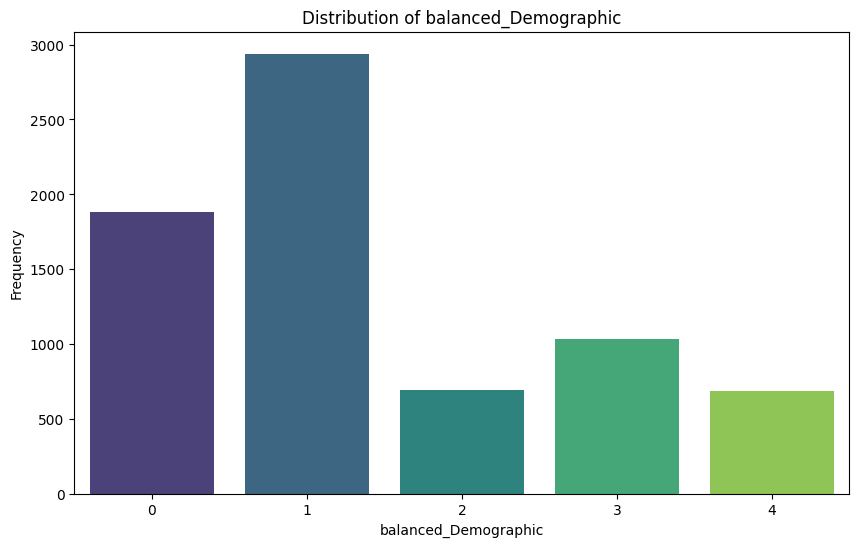

In [21]:
demographic_distribute = y_smoteenn_df['balanced_Demographic'].value_counts()

# Vẽ biểu đồ thanh với matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x=demographic_distribute.index, y=demographic_distribute.values, palette='viridis')
plt.title('Distribution of balanced_Demographic')
plt.xlabel('balanced_Demographic')
plt.ylabel('Frequency')
plt.show()

In [22]:
X_clean_train, y_clean_train = X_smoteenn_df, y_smoteenn_df

<h2 style="color: #EFD1B4;" id="modeling_building">Xây dựng mô hình</h2>

---

Trong đồ án này, chúng tôi sử dụng mô hình cây ETC (ExtraTreesClassifier) để thực hiện phân loại các manga

Cây ETC sử dụng các nguyên lý của cây quyết định và cải tiến thêm bằng cách tăng độ ngẫu nhiên trong quá trình xây dựng cây, nhằm nâng cao hiệu suất mô hình.

In [23]:
model = ExtraTreesClassifier()
model.fit(X_clean_train, y_clean_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)

c:\Users\MINH HUNG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 1.1099050203527816


c:\Users\MINH HUNG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


ETC Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.56      0.26       154
           1       0.12      0.44      0.19        16
           2       0.53      0.42      0.46       621
           3       0.76      0.57      0.65       776
           4       0.56      0.50      0.53       644

    accuracy                           0.50      2211
   macro avg       0.43      0.49      0.42      2211
weighted avg       0.59      0.50      0.53      2211



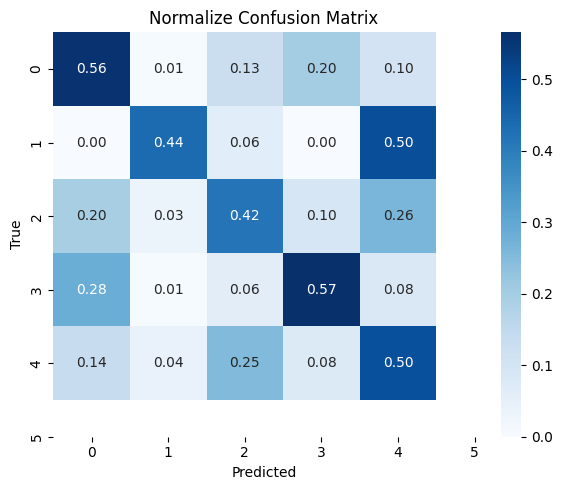

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"ETC Classification Report:\n{class_report}")

# Plot Confusion Matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
plt.title("Normalize Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [25]:
r2 = r2_score(y_pred,y_test)
print(r2)

-0.32284152964262214


In [26]:
for i in range(20):
    print('Predicted: {:.2f};\n     Real: {};\n'.format(y_pred[i], y_test[i]))

Predicted: 2.00;
     Real: 4;

Predicted: 0.00;
     Real: 4;

Predicted: 3.00;
     Real: 3;

Predicted: 4.00;
     Real: 2;

Predicted: 3.00;
     Real: 3;

Predicted: 4.00;
     Real: 4;

Predicted: 2.00;
     Real: 2;

Predicted: 3.00;
     Real: 3;

Predicted: 0.00;
     Real: 3;

Predicted: 0.00;
     Real: 3;

Predicted: 0.00;
     Real: 3;

Predicted: 4.00;
     Real: 4;

Predicted: 0.00;
     Real: 3;

Predicted: 1.00;
     Real: 4;

Predicted: 0.00;
     Real: 3;

Predicted: 3.00;
     Real: 3;

Predicted: 4.00;
     Real: 3;

Predicted: 4.00;
     Real: 4;

Predicted: 3.00;
     Real: 2;

Predicted: 4.00;
     Real: 4;

